In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numba import njit, prange
from scipy import sparse
from scipy.sparse import linalg

In [2]:
matplotlib.rcParams["font.size"] = 15

In [3]:
matplotlib.rcParams["font.size"] = 15

In [4]:
matplotlib.rcParams["figure.figsize"] = (10, 10)

In [5]:
N = 50
dx = 0.001

In [6]:
left_x = 1
left_y = 0
right_x = 0
right_y = 0
top_x = 0
top_y = 1
bottom_x = 0
bottom_y = 0

In [7]:
_A_1 = sparse.eye(N)
D_2 = sparse.eye(N, k=1) + sparse.eye(N, k=-1) - 2 * _A_1
L = 1 / (dx**2) * (sparse.kron(D_2, _A_1) + sparse.kron(_A_1, D_2))
b_ux = np.zeros(N**2)
b_uy = b_ux.copy()

In [8]:
L1 = L.copy()
L1 = L1.tolil()
for i in np.arange(0, N**2, N):
    L1[i] = 0
    L1[i, i] = 1
    b_ux[i] = left_x
    b_uy[i] = left_y

for i in np.arange(N-1, N**2, N):
    L1[i] = 0
    L1[i, i] = 1
    b_ux[i] = right_x
    b_uy[i] = right_y

for i in range(N):
    L1[i] = 0
    L1[i, i] = 1
    b_ux[i] = bottom_x
    b_uy[i] = bottom_y
    _i = -i - 1
    L1[_i] = 0
    L1[_i, _i] = 1
    b_ux[_i] = top_x
    b_uy[_i] = top_y

In [9]:
L1 = L1.tocsr()

In [10]:
u_star_x = linalg.spsolve(L1, b_ux)
u_star_y = linalg.spsolve(L1, b_uy)

In [11]:
D1 = 0.5 * sparse.eye(N, k=1) - 0.5 * sparse.eye(N, k=-1)
D1 = D1.tolil()
D1[0,0] = -1
D1[0,1] = 1
D1[-1,-1] = 1
D1[-1,-2] = -1
D1 /= dx
Dx = sparse.kron(sparse.eye(N), D1)
Dy = sparse.kron(D1, sparse.eye(N))

In [12]:
DXX = Dx @ u_star_x
DYY = Dy @ u_star_y

In [13]:
phi = linalg.spsolve(L, (-(DXX + DYY)))

In [14]:
dphi = [Dx @ phi, Dy @ phi]

In [15]:
ux = u_star_x + dphi[0]
uy = u_star_y + dphi[1]

In [16]:
xx, yy = np.meshgrid(np.arange(N), np.arange(N))
x = xx.flatten()
y = yy.flatten()

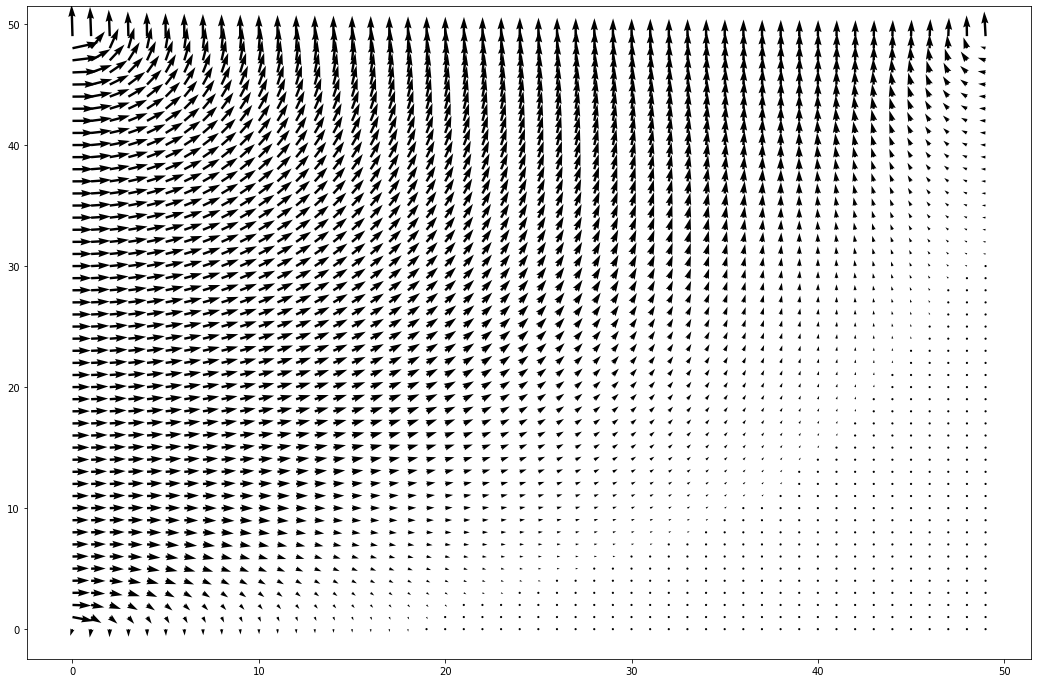

In [17]:
plt.figure(figsize=(18, 12))
plt.quiver(xx, yy, ux, uy)
# plt.streamplot(xx, yy, u_star1, u_star2)
plt.show()

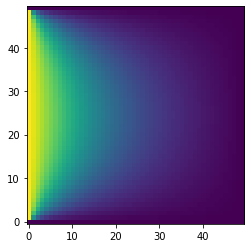

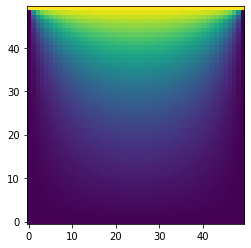

In [18]:
plt.imshow(u_star_x.reshape(N, N), origin="lower")
plt.show()

plt.imshow(u_star_y.reshape(N, N), origin="lower")
plt.show()